In [3]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df_normal_list = []
pathlist = Path("/home/aggelos/Downloads/simu Elbas/7h33NO").glob('**/*.xls')
for path in pathlist:
    # because path is object not string
    path_in_str = str(path)
    df = pd.read_csv(path_in_str, delimiter='\t')
    df = df[['loc. (actual) [km]', 'voltage [V]']]
    df = df.set_index("loc. (actual) [km]")
    df.sort_index(inplace=True)
    df_normal_list.append(df)

In [6]:
#try for first df
df = df_normal_list[0]


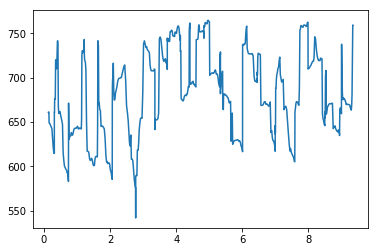

In [7]:
# suppose that we set our threshold at mean - 2*std
window = 25
rolling_thres = df.rolling(window=window).mean() - 5*df.rolling(window=window).std()
plt.plot(rolling_thres)
const_thres = df.mean() - 2*df.std()

In [16]:
df_error_list = []
pathlist = Path("/home/aggelos/Downloads/simu Elbas/7h33D1").glob('**/*.xls')
for path in pathlist:
    # because path is object not string
    path_in_str = str(path)
    df = pd.read_csv(path_in_str, delimiter='\t')
    df = df[['loc. (actual) [km]', 'voltage [V]']]
    df = df.set_index("loc. (actual) [km]")
    df.sort_index(inplace=True)
    df_error_list.append(df)

In [25]:
df_error = df_error_list[0]
df_error.head()
df_error = df_error.set_index(df.index)

 ...]

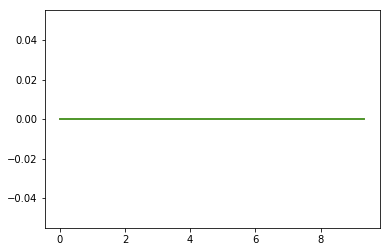

In [28]:
# problem is distance measurements are a bot different
errors_roll_thresh = df_error < rolling_thres['voltage [V]']


In [32]:
df_error.head()

,voltage [V]
loc. (actual) [km],
0.005189,784.020508
0.018245,786.796204
0.022167,788.137024
0.022278,788.706299
0.023361,794.198059
